In [12]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


import matplotlib.pyplot as plt
import numpy as np
import os  
import pandas as pd
import seaborn as sns
import time

In [13]:
sns.set_theme(style="whitegrid", palette=sns.hls_palette(n_colors=4, h=.4), font_scale=1.2, context="paper")
palette = sns.hls_palette(n_colors=4, h=.4)
palette

[(0.33999999999999997, 0.86, 0.548),
 (0.33999999999999997, 0.3919999999999998, 0.86),
 (0.86, 0.33999999999999997, 0.6519999999999999),
 (0.86, 0.8079999999999997, 0.33999999999999997)]

In [14]:
def plot_modelComparison(dataset, percBoruta, plotIt=True):
    ''' 
    Prepare data
    '''
    print(dataset)

    path_BASE = f"/home/WUR/katz001/PROJECTS/permit-nsti-gas"
    target = "Conclusion_micro"
    vars = f"iterativeBoruta_{percBoruta}perc"    
    varPath = f"{path_BASE}/results/20_featureSelection/{dataset}/CV/{target}_bootstrapped_{vars}.txt"
    sel_variables = pd.read_csv(varPath, header=None)[0].tolist()
    print(len(sel_variables),"\t",sel_variables)
    path_results = f"{path_BASE}/results/30_modelComparison/{dataset}/{vars}/modelComparison"
    folderFigures =  f"{path_BASE}/figures/{dataset}/{vars}"
    os.makedirs(folderFigures, exist_ok=True)

    ''' 
    Load data
    '''
    models = ['rfc', 'log', 'gpc', 'xgb']#, 'mcl'] #'svc'
    df_scoring = pd.DataFrame()
    for model in models:
        df = pd.read_csv(path_results+f"/prediction_modelComparison_{model}_minimiseFN.csv", index_col=0).T   
        df_scoring = pd.concat([df_scoring, df], axis=0)
    df_scoring.to_csv(f"{folderFigures}/{vars}_LOOCV_modelComparison_scoring.csv", index=False)

    ''' Plot '''
    if plotIt:
        #c = [sns.hls_palette(n_colors=4, h=.4)[0]] + 4*[sns.color_palette("Greys")[2]]
        fig, (axs_upper, axs_lower) = plt.subplots(2,3, figsize=(8,5,)) #11.69,8.27
        df_scoring_plot = df_scoring.melt("model")


        for ax, metric in zip(axs_upper, df_scoring.drop("model", axis=1).columns.tolist()[:3]):
            df = df_scoring_plot[df_scoring_plot["variable"] == metric]
            df.loc[:,"value"] = df.loc[:,"value"].astype('float')
            sns.barplot(data=df, x="model", y="value", ax=ax, palette=palette)
            ax.tick_params(axis='x', rotation=90)
            ax.set_xlabel("")
            ax.set_ylabel("")
            ax.set_title(metric)
            ax.set_ylim(0,1)
            ax.set_xticklabels(list(map(str.upper,df_scoring["model"])))

        for ax, metric in zip(axs_lower, df_scoring.drop("model", axis=1).columns.tolist()[3:]):
            df = df_scoring_plot[df_scoring_plot["variable"] == metric]
            df.loc[:,"value"] = df.loc[:,"value"].astype('float')
            sns.barplot(data=df, x="model", y="value", ax=ax, palette=palette)
            ax.tick_params(axis='x', rotation=90)
            ax.set_xlabel("")
            ax.set_title(metric)
            ax.set_ylabel("")
            ax.set_ylim(0,1)
            ax.set_xticklabels(list(map(str.upper,df_scoring["model"])))
            
        fig.suptitle(f"{dataset} - {vars}", y=1)
        plt.tight_layout() 
        plt.show()
        fig.savefig(f"{folderFigures}/comparisonModels_{dataset}.png", dpi=300)

    return df_scoring


# ENTRY

ENTRY
6 	 ['AGE', 'UPPER_ARM_ARRIVAL', 'LOWER_ARM_ARRIVAL', 'ANOGENITAL_ARRIVAL', 'SURGERY_BEFORE', 'DIABETES']


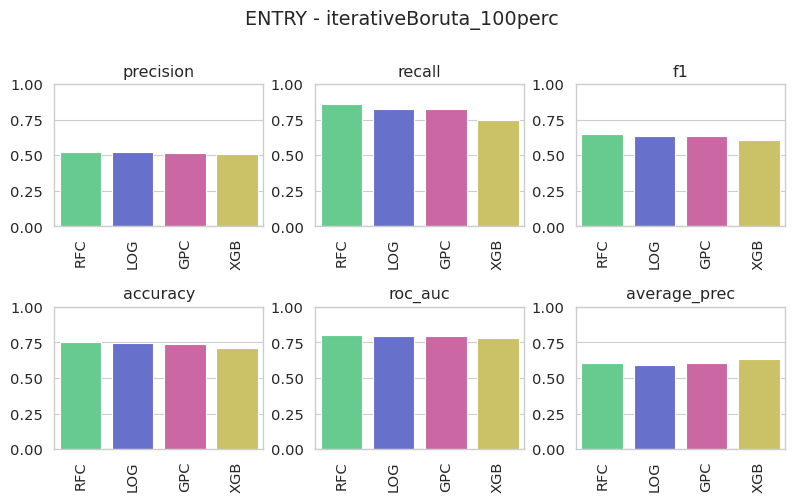

,precision,recall,f1,accuracy,model,roc_auc,average_prec
0,0.5242718446601942,0.8571428571428571,0.6506024096385542,0.7554265522463401,rfc,0.80371866060912,0.604325896681969
0,0.52,0.8253968253968254,0.6380368098159509,0.743087105277918,log,0.7924729373492624,0.5945274367831019
0,0.5174129353233831,0.8253968253968254,0.636085626911315,0.7413203208256212,gpc,0.7940153682203153,0.6082911547544244
0,0.5108695652173914,0.746031746031746,0.6064516129032258,0.7140052723091592,xgb,0.7839475012619889,0.6314729936081638


In [15]:
plot_modelComparison(
    dataset="ENTRY", 
    percBoruta=100, 
    plotIt=True
)

# PRESURGERY

PRESURGERY
8 	 ['creatinine_preop', 'hgb_preop', 'UPPER_ARM_ARRIVAL', 'LOWER_ARM_ARRIVAL', 'ANOGENITAL_ARRIVAL', 'DIABETES', 'SURGERY_BEFORE', 'AGE']


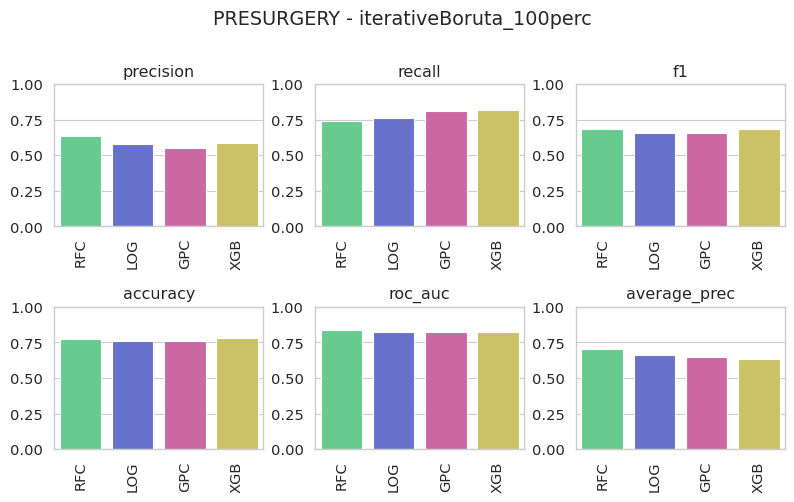

,precision,recall,f1,accuracy,model,roc_auc,average_prec
0,0.6326530612244898,0.7380952380952381,0.6813186813186813,0.7736412586235908,rfc,0.8383252005160132,0.7037200354659141
0,0.5818181818181818,0.7619047619047619,0.6597938144329897,0.7590442537439004,log,0.8251444276179258,0.6588842655036115
0,0.5513513513513514,0.8095238095238095,0.6559485530546624,0.7581187952212687,gpc,0.8267429468842896,0.6462657419424372
0,0.5852272727272727,0.8174603174603174,0.6821192052980133,0.779754893712491,xgb,0.8235178641539066,0.634096495015628


In [16]:
plot_modelComparison(
    dataset="PRESURGERY", 
    percBoruta=100, 
    plotIt=True
)

# POSTSURGERY

POSTSURGERY
9 	 ['sample_site_1', 'creatinine_preop', 'hgb_preop', 'UPPER_ARM_ARRIVAL', 'ANOGENITAL_ARRIVAL', 'SURGERY_BEFORE', 'DIABETES', 'LOWER_ARM_ARRIVAL', 'preadmission_creatinine']


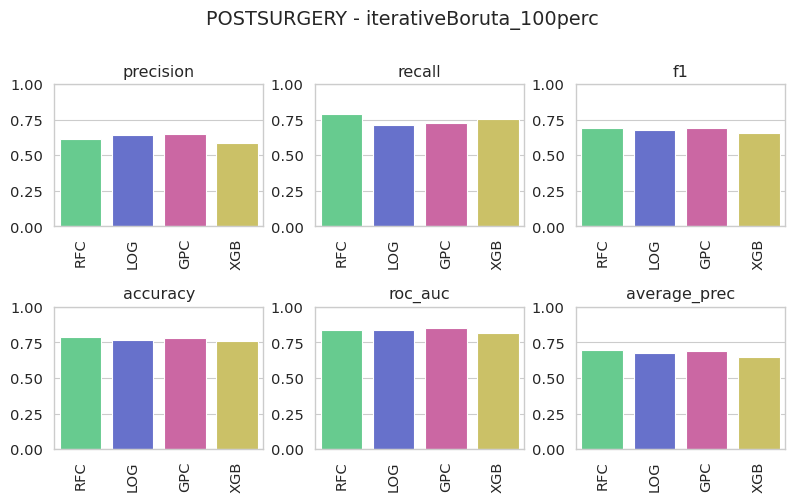

,precision,recall,f1,accuracy,model,roc_auc,average_prec
0,0.6172839506172839,0.7936507936507936,0.6944444444444444,0.787284760782994,rfc,0.8388019518761569,0.7003123642687855
0,0.6428571428571429,0.7142857142857143,0.6766917293233082,0.7688036345280161,log,0.8397834987940994,0.6735911349853341
0,0.6524822695035462,0.7301587301587301,0.6891385767790262,0.7785069269168209,gpc,0.8502720287172583,0.6931706264470446
0,0.5864197530864198,0.753968253968254,0.6597222222222222,0.7586095686802401,xgb,0.8135621739862022,0.6504520563349503


In [17]:
plot_modelComparison(
    dataset="POSTSURGERY", 
    percBoruta=100, 
    plotIt=True
)

# BL

BL
14 	 ['sys_bp_low_bl', 'creatinine_preop', 'hgb_preop', 'creatinine_BL', 'NA_max_BL', 'platelet_BL', 'lactate_BL', 'glucose_BL', 'ANOGENITAL_ARRIVAL', 'SURGERY_BEFORE', 'preadmission_creatinine', 'LOWER_ARM_ARRIVAL', 'UPPER_ARM_ARRIVAL', 'DIABETES']


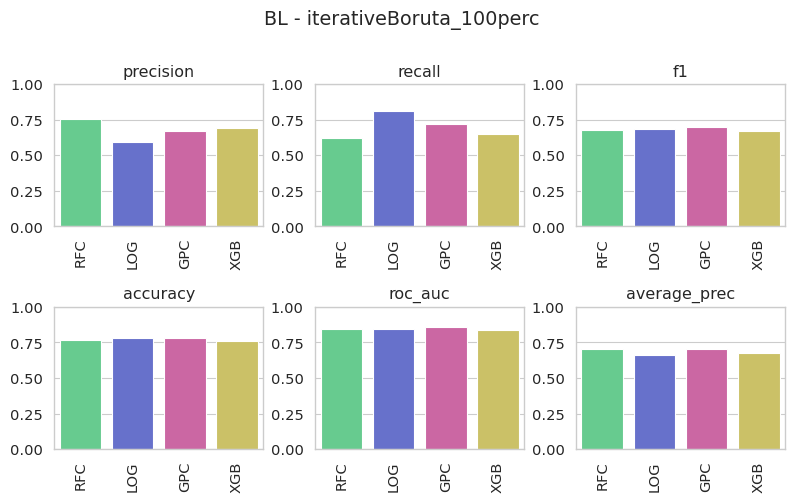

,precision,recall,f1,accuracy,model,roc_auc,average_prec
0,0.7572815533980582,0.6190476190476191,0.6812227074235808,0.7653541982163891,rfc,0.8459532222783106,0.7041129951318015
0,0.5930232558139535,0.8095238095238095,0.6845637583892618,0.7810869931011274,log,0.8439340400471143,0.6597435200516479
0,0.674074074074074,0.7222222222222222,0.6973180076628352,0.783372595210051,gpc,0.8597229233271636,0.7043442628755812
0,0.6890756302521008,0.6507936507936508,0.6693877551020408,0.760025800661843,xgb,0.8366425486566829,0.675929935544375


In [18]:
plot_modelComparison(
    dataset="BL", 
    percBoruta=100, 
    plotIt=True
)